In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import cv2  # pip install opencv-python
            # pip install opencv-contrib-python

In [89]:
frame_rate = 100 # video recording 
LED_threshhold = 100 # 

video_L_path = 'video\20240122_R12_syn_anes_002_L_fullres_15-16-16.avi'
video_R_path = 'video/20240122_R12_syn_anes_002_R_fullres_15-16-16.avi'

# Setting the points for cropped image - Right camera
left_R, top_R, right_R, bottom_R = 1110, 350, 1120, 360
left_L, top_L, right_L, bottom_L = 780, 70, 790, 80

In [90]:
video_L = cv2.VideoCapture(video_L_path)
brightness_L = []

while (video_L.isOpened()):
    ret_L, frame_L = video_R.read()
    if not ret_L:
        print("1")
        break
    frame_L_8bit = cv2.cvtColor(frame_L,cv2.COLOR_BGR2GRAY)
    cropped_frame_L = frame_L_8bit[top_L:bottom_L,left_L:right_L] # Crop the frame
    brightness_L.append(cv2.mean(cropped_frame_L)[0]) # Calculate brightness of the cropped frame (average pixel intensity)
video_L.release()


In [88]:
video_R = cv2.VideoCapture(video_R_path)
brightness_R = []

while (video_R.isOpened()):
    ret_R, frame_R = video_R.read()
    if not ret_R:
        break
    frame_R_8bit = cv2.cvtColor(frame_R,cv2.COLOR_BGR2GRAY)
#     plt.imshow(cv2.cvtColor(frame_R, cv2.COLOR_BGR2RGB))
    cropped_frame_R = frame_R_8bit[top_R:bottom_R,left_R:right_R] # Crop the frame
#     plt.imshow(cv2.cvtColor(cropped_frame_R, cv2.COLOR_BGR2RGB))
    brightness_R.append(cv2.mean(cropped_frame_R)[0]) # Calculate brightness of the cropped frame (average pixel intensity)
video_R.release()

1


In [69]:
brightness_L

[]

9967


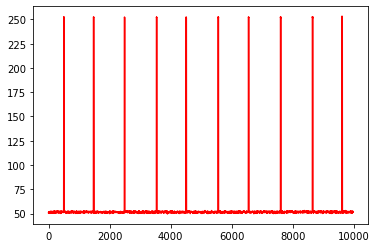

In [83]:
plt.plot(range(0,len(brightness_R)),brightness_R,color='r',label="R")
print(len(brightness_R))

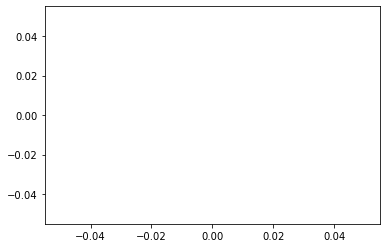

In [91]:
plt.plot(range(0,len(brightness_L)),brightness_L,color='b',label="L")

ValueError: x and y must have same first dimension, but have shapes (9967,) and (0,)

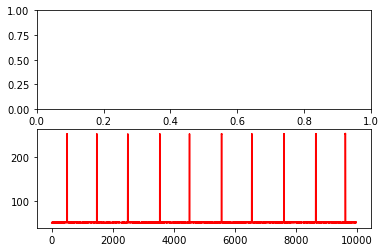

In [64]:
fig, (fig_L, fig_R) = plt.subplots(2, 1, sharex=True)
fig_R.plot(range(0,len(brightness_R)),brightness_R,color='r',label="R")
fig_R.legend()
fig_L.plot(range(0,len(brightness_L)),brightness_L,color='b',label="L")
fig_L.legend()


In [71]:
LED_time = pd.read_csv('video/LED.csv') # LED signal for synchronization
LED_time.rename(columns={'Slice':'Frame','Mean':'LED_Signal'},inplace = True)
print(LED_time)

      Frame  LED_Signal
0         1      54.623
1         2      54.613
2         3      54.730
3         4      54.574
4         5      54.474
...     ...         ...
9962   9963      54.660
9963   9964      54.731
9964   9965      54.886
9965   9966      54.967
9966   9967      54.667

[9967 rows x 2 columns]


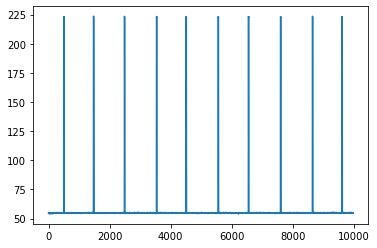

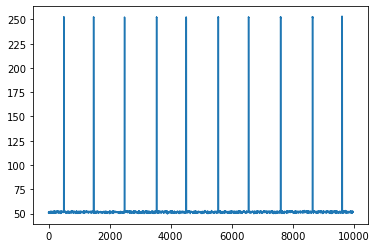

In [77]:
X = range(0,9967)
plt.figure()
plt.plot(X,LED_time['LED_Signal'])
plt.figure()
plt.plot(X,brightness_R)

In [ ]:
# make signal-on = 1 ,signal-off = 0
def modify_to_binary(value):
    if value > LED_threshhold:
        return 1
    else:
        return 0

In [ ]:
LED_time['LED_Signal'] = LED_time['LED_Signal'].apply(modify_to_binary)
LED_time

In [ ]:
# Upsample video data to match ephys data sample rate
LED_time_up = np.repeat(LED_time['LED_Signal'].values,sample_rate/frame_rate)
print(len(LED_time_up))
plt.plot(LED_time_up)

In [ ]:
LED_time_gap = []
LED_time_point = []
for index in range(0,len(LED_time_up)-1):
    if (LED_time_up[index+1] - LED_time_up[index] < 0):
        LED_time_point.append(index)
for index in range(0,len(LED_time_point)-1):
    LED_time_gap.append((LED_time_point[index+1] - LED_time_point[index])/sample_rate)

print(LED_time_gap)
print(LED_time_point)